In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = sns.load_dataset('titanic')
print(df)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class   
0           0       3    male  22.0      1      0   7.2500        S   Third  \
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [3]:
df[['survived','pclass','fare']].groupby('pclass').describe()

survived                                                fare   
          count      mean       std  min  25%  50%  75%  max  count   
pclass                                                                
1         216.0  0.629630  0.484026  0.0  0.0  1.0  1.0  1.0  216.0  \
2         184.0  0.472826  0.500623  0.0  0.0  0.0  1.0  1.0  184.0   
3         491.0  0.242363  0.428949  0.0  0.0  0.0  0.0  1.0  491.0   

                                                                      
             mean        std  min       25%      50%   75%       max  
pclass                                                                
1       84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292  
2       20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000  
3       13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

In [5]:
col_rem = ['survived', 'embarked', 'embark_town','who', 'sibsp','parch', 'deck', 'fare']
filtered_df = df.drop(columns=col_rem)

In [6]:
filtered_df # dataframe without irrelevant values

,pclass,sex,age,class,adult_male,alive,alone
0,3,male,22.0,Third,True,no,False
1,1,female,38.0,First,False,yes,False
2,3,female,26.0,Third,False,yes,True
3,1,female,35.0,First,False,yes,False
4,3,male,35.0,Third,True,no,True
...,...,...,...,...,...,...,...
886,2,male,27.0,Second,True,no,True
887,1,female,19.0,First,False,yes,True
888,3,female,NaN,Third,False,no,False
889,1,male,26.0,First,True,yes,True


In [7]:
dropped_df = filtered_df.dropna() # rows will unknown ages removed.

In [8]:
print(dropped_df)

     pclass     sex   age   class  adult_male alive  alone
0         3    male  22.0   Third        True    no  False
1         1  female  38.0   First       False   yes  False
2         3  female  26.0   Third       False   yes   True
3         1  female  35.0   First       False   yes  False
4         3    male  35.0   Third        True    no   True
..      ...     ...   ...     ...         ...   ...    ...
885       3  female  39.0   Third       False    no  False
886       2    male  27.0  Second        True    no   True
887       1  female  19.0   First       False   yes   True
889       1    male  26.0   First        True   yes   True
890       3    male  32.0   Third        True    no   True

[714 rows x 7 columns]


In [9]:
dropped_df.iloc[[713]]

,pclass,sex,age,class,adult_male,alive,alone
890,3,male,32.0,Third,True,no,True


In [10]:
dropped_df['alive'] = dropped_df['alive'].astype('category')
dropped_df['alive'] = dropped_df['alive'].cat.codes

/tmp/ipykernel_3732/976792217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_df['alive'] = dropped_df['alive'].astype('category')
/tmp/ipykernel_3732/976792217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_df['alive'] = dropped_df['alive'].cat.codes


In [11]:
dropped_df

,pclass,sex,age,class,adult_male,alive,alone
0,3,male,22.0,Third,True,0,False
1,1,female,38.0,First,False,1,False
2,3,female,26.0,Third,False,1,True
3,1,female,35.0,First,False,1,False
4,3,male,35.0,Third,True,0,True
...,...,...,...,...,...,...,...
885,3,female,39.0,Third,False,0,False
886,2,male,27.0,Second,True,0,True
887,1,female,19.0,First,False,1,True
889,1,male,26.0,First,True,1,True


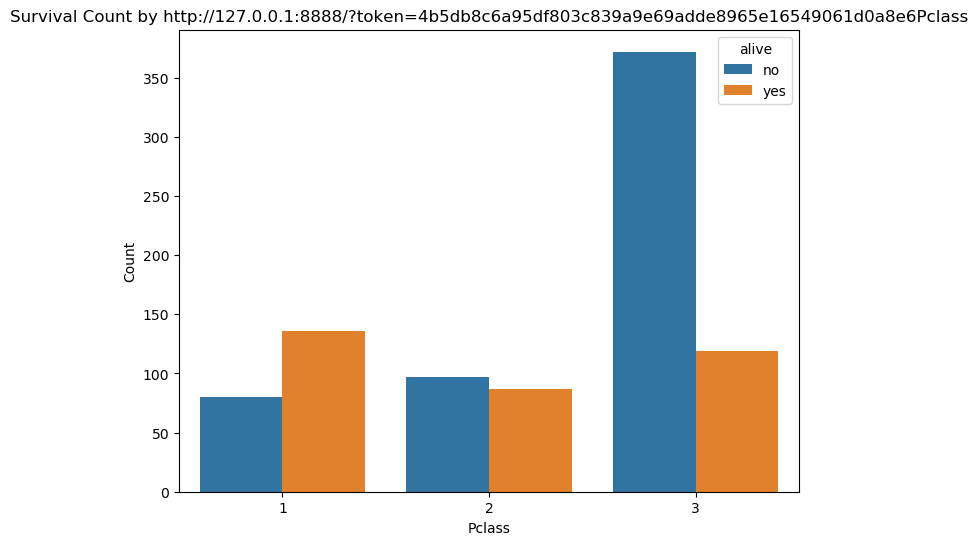

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='pclass', hue='alive', data=df)
plt.title('Survival Count by http://127.0.0.1:8888/?token=4b5db8c6a95df803c839a9e69adde8965e16549061d0a8e6Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()


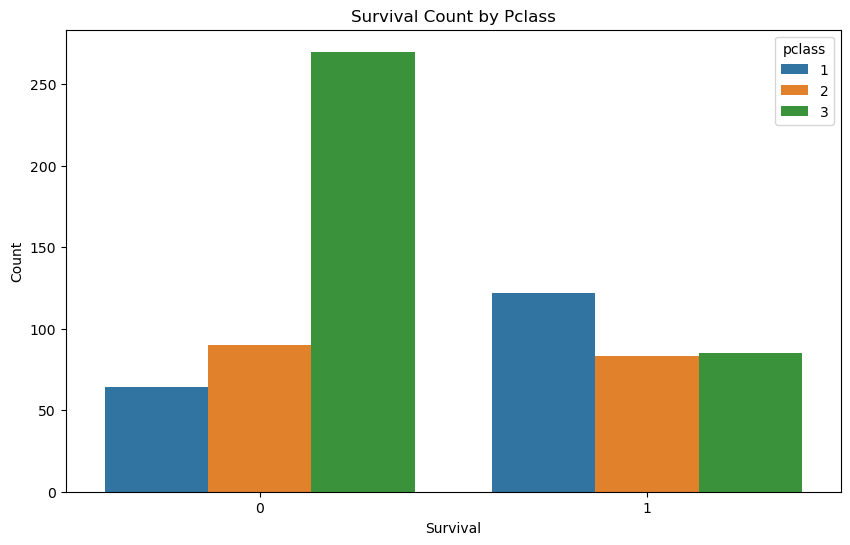

In [13]:


# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))
sns.countplot(x='alive', hue='pclass', data=dropped_df)
plt.title('Survival Count by Pclass')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.show()


## From the above bar plot it is clear that the survival count of the first class passengers is the maximum and it is minimum for third class people. The count of alive and dead is almost same for 2nd class. It can be said that the priority was given to the first class people.

In [14]:
dropped_df.drop(columns=['class'],inplace =True)

/tmp/ipykernel_3732/3186331729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_df.drop(columns=['class'],inplace =True)


In [15]:
dropped_df

,pclass,sex,age,adult_male,alive,alone
0,3,male,22.0,True,0,False
1,1,female,38.0,False,1,False
2,3,female,26.0,False,1,True
3,1,female,35.0,False,1,False
4,3,male,35.0,True,0,True
...,...,...,...,...,...,...
885,3,female,39.0,False,0,False
886,2,male,27.0,True,0,True
887,1,female,19.0,False,1,True
889,1,male,26.0,True,1,True


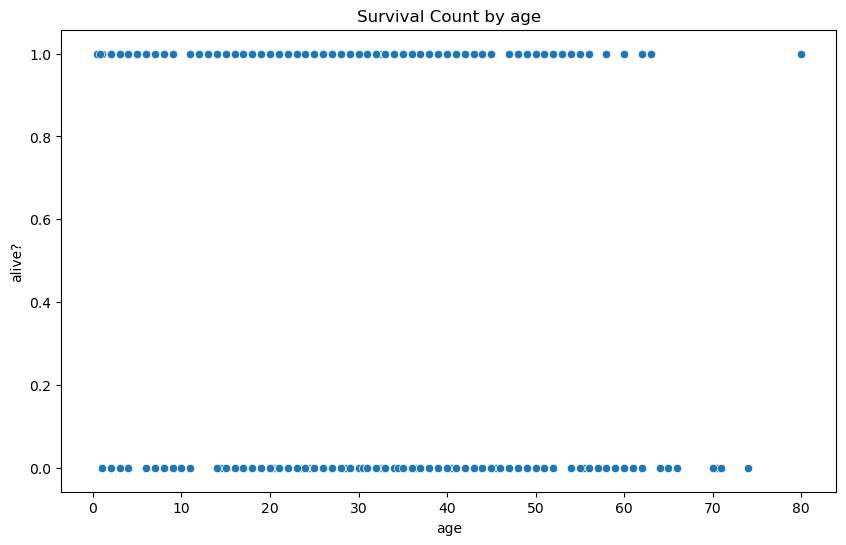

In [26]:


# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age',y='alive', data=dropped_df)
plt.title('Survival Count by age')
plt.xlabel('age')
plt.ylabel('alive?')
plt.show()


In [19]:
# Assuming age_survival is a dictionary with age groups as keys
age_survival = {10: {'total': 0, 'alive': 0},
                20: {'total': 0, 'alive': 0},
                30: {'total': 0, 'alive': 0},
                40: {'total': 0, 'alive': 0},
                50: {'total': 0, 'alive': 0},
                60: {'total': 0, 'alive': 0},
                70: {'total': 0, 'alive': 0},
                80: {'total': 0, 'alive': 0},
                90: {'total': 0, 'alive': 0}}

# Assuming dropped_df is your DataFrame
for index, row in dropped_df[['alive', 'age']].iterrows():
    alive_value = row['alive']
    age_value = row['age']

    if 0 <= age_value <= 10 :
        age_survival[10]['total'] += 1
        if alive_value == 1:
            age_survival[10]['alive'] += 1
    elif 11 <= age_value <= 20 :
        age_survival[20]['total'] += 1
        if alive_value == 1:
            age_survival[20]['alive'] += 1
    elif 21 <= age_value <= 30 :
        age_survival[30]['total'] += 1
        if alive_value == 1:
            age_survival[30]['alive'] += 1
    elif 31 <= age_value <= 40:
        age_survival[40]['total'] += 1
        if alive_value == 1:
            age_survival[40]['alive'] += 1
    elif 41 <= age_value <= 50:
        age_survival[50]['total'] += 1
        if alive_value == 1:
            age_survival[50]['alive'] += 1
    elif 51 <= age_value <= 60 :
        age_survival[60]['total'] += 1
        if alive_value == 1:
            age_survival[60]['alive'] += 1
    elif 61 <= age_value <= 70 :
        age_survival[70]['total'] += 1
        if alive_value == 1:
            age_survival[70]['alive'] += 1
    elif 71 <= age_value <= 80 :
        age_survival[80]['total'] += 1
        if alive_value == 1:
            age_survival[80]['alive'] += 1
    elif 81 <= age_value :
        age_survival[90]['total'] += 1
        if alive_value == 1:
            age_survival[90]['alive'] += 1

# Print the results
for age_group, values in age_survival.items():
    print(f"Age Group {age_group}: Total - {values['total']}, Alive - {values['alive']}")


Age Group 10: Total - 64, Alive - 38
Age Group 20: Total - 115, Alive - 44
Age Group 30: Total - 229, Alive - 84
Age Group 40: Total - 153, Alive - 69
Age Group 50: Total - 84, Alive - 33
Age Group 60: Total - 42, Alive - 17
Age Group 70: Total - 17, Alive - 4
Age Group 80: Total - 4, Alive - 1
Age Group 90: Total - 0, Alive - 0


In [20]:
for keys in age_survival.keys():
    total = age_survival[keys]['total']
    alive = age_survival[keys]['alive']
    if total != 0: 
        print(f'Survival rate of age group{keys} = {(alive/total)*100}')

Survival rate of age group10 = 59.375
Survival rate of age group20 = 38.26086956521739
Survival rate of age group30 = 36.681222707423586
Survival rate of age group40 = 45.09803921568628
Survival rate of age group50 = 39.285714285714285
Survival rate of age group60 = 40.476190476190474
Survival rate of age group70 = 23.52941176470588
Survival rate of age group80 = 25.0


## From the above it can be seen that survival rate of the age group 0-10 is maximum followed by 40

In [21]:
male_survival = dropped_df[(dropped_df['sex'] == 'male') & (dropped_df['alive'] == 1)].shape[0]
male_total =  dropped_df[(dropped_df['sex'] == 'male')].shape[0]
female_total =  dropped_df[(dropped_df['sex'] == 'female')].shape[0]
female_survival =  dropped_df[(dropped_df['sex'] == 'female') & (dropped_df['alive'] == 1)].shape[0]
'alive'
print(f'Survival rate of men = {(male_survival/male_total)*100}')
print(f'Survival rate of women = {(female_survival/female_total)*100}')

Survival rate of men = 20.52980132450331
Survival rate of women = 75.47892720306514


## Women and children were given priority ahead of men but, only 60% of the children survived the mishap, whereas it was 75% for  women.

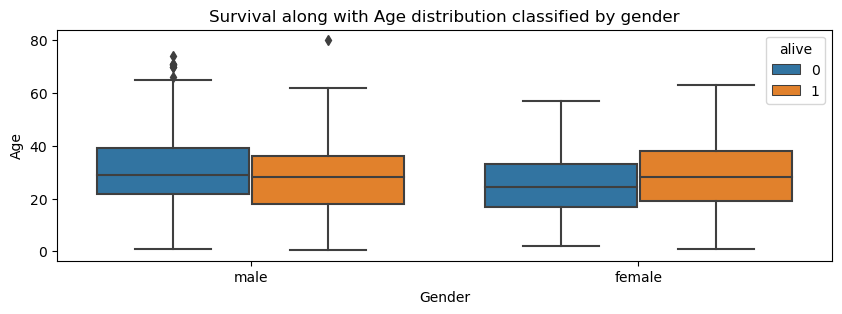

In [25]:
plt.figure(figsize=(10,3))
sns.boxplot(x=dropped_df['sex'], y =np.values dropped_df['age'], hue = dropped_df['alive'])
plt.title('Survival along with Age distribution classified by gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

From the above box plot we can note that, in both women and  men comparitively younger ones survived.

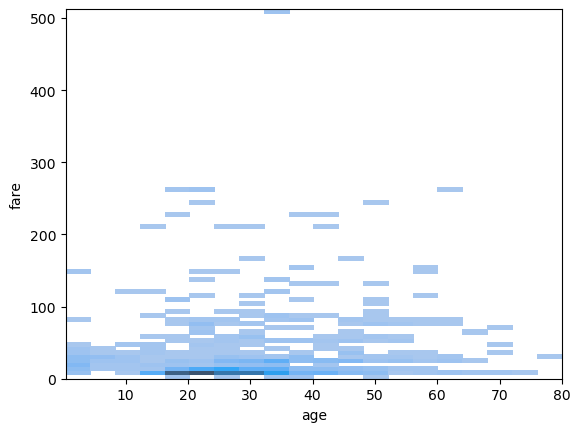

In [ ]:
# sns.histplot(data=dropped_df['fare'])
fare_distro = df.drop(columns=['survived', 'embarked', 'embark_town','who', 'sibsp','parch', 'deck',])

sns.histplot(data=fare_distro, x='age',y = 'fare')


It can be clearly observed that maximum passengers  have paid tickets pricing between 0 -100. The age group around 18 - 32 seems to be the group having maximum number of people having paid the minimum fare price.